# Yelp Data Challenge - Data Preprocessing

BitTiger DS501

Jun 2017

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [1]:
import json
import pandas as pd

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'dataset/business.json',
    'dataset/checkin.json',
    'dataset/review.json',
    'dataset/tip.json',
    'dataset/user.json'
]

#### Business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.0+ MB


#### Checkin Data

In [6]:
# with open(file_checkin) as f:
#     df_checkin = pd.DataFrame(json.loads(line) for line in f)
# df_checkin.head(2)

#### Review Data

In [7]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


In [8]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261669 entries, 0 to 5261668
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


#### Tip Data

In [9]:
# with open(file_tip) as f:
#     df_tip = pd.DataFrame(json.loads(line) for line in f)
# df_tip.head(2)

#### User Data

In [10]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [11]:
# Create Pandas DataFrame filters
df_business[df_business['city'].str.match('Las Vegas')]
df_business[df_business.categories.notnull()]
df_business[df_business['categories'].apply(str).str.contains('Restaurants')]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH
5,Richterstr. 11,"{'GoodForMeal': {'dessert': False, 'latenight'...",o9eMRCWt5PkpLDE0gOPtcQ,"[Italian, Restaurants]",Stuttgart,"{'Monday': '18:00-0:00', 'Tuesday': '18:00-0:0...",1,48.727200,9.147950,Messina,,70567,5,4.0,BW
10,737 West Pike St,"{'RestaurantsTableService': True, 'GoodForMeal...",XOSRcvtaKc_Q5H1SAzN20A,"[Breakfast & Brunch, Gluten-Free, Coffee & Tea...",Houston,{},0,40.241548,-80.212815,East Coast Coffee,,15342,3,4.5,PA
14,600 E 4th St,"{'GoodForMeal': {'dessert': False, 'latenight'...",fNMVV_ZX7CJSDWQGdOM8Nw,"[Restaurants, American (Traditional)]",Charlotte,"{'Friday': '7:00-15:00', 'Tuesday': '7:00-15:0...",1,35.221647,-80.839345,Showmars Government Center,Uptown,28202,7,3.5,NC
15,2459 Yonge St,"{'GoodForMeal': {'dessert': False, 'latenight'...",l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French, Restaurants]",Toronto,"{'Monday': '9:00-22:00', 'Tuesday': '9:00-22:0...",0,43.711399,-79.399339,Alize Catering,Yonge and Eglinton,M4P 2H6,12,3.0,ON
19,"9665 Bayview Avenue, Unit 1-4","{'RestaurantsTableService': True, 'GoodForMeal...",Gu-xs3NIQTj3Mj2xYoN2aw,"[French, Food, Bakeries, Restaurants]",Richmond Hill,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,43.867565,-79.412662,Maxim Bakery & Restaurant,,L4C 9V4,34,3.5,ON
25,1058 Gerrard Street E,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",1K4qrnfyzKzGgJPBEcJaNQ,"[Tiki Bars, Nightlife, Mexican, Restaurants, B...",Toronto,"{'Monday': '11:30-2:00', 'Tuesday': '11:30-2:0...",1,43.669256,-79.335902,Chula Taberna Mexicana,Leslieville,M4M 3A6,39,3.5,ON
28,38295 Chestnut Ridge Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",Dj0S-Oe4ytRJzMGUPgYUkw,"[Soup, Salad, Sandwiches, Restaurants]",Elyria,"{'Monday': '6:30-21:00', 'Tuesday': '6:30-21:0...",1,41.343078,-82.067140,Panera Bread,,44035,4,2.0,OH
29,2429 Hwy 160 W,"{'GoodForMeal': {'dessert': False, 'latenight'...",gAy4LYpsScrj8POnCW6btQ,"[Food, American (Traditional), Coffee & Tea, R...",Fort Mill,"{'Monday': '7:00-15:00', 'Tuesday': '7:00-15:0...",0,35.047287,-80.990559,Toast Cafe,,29708,6,3.5,SC
30,2777 Steeles Avenue W,"{'GoodForMeal': {'dessert': False, 'latenight'...",nbhBRhZtdaZmMMeb2i02pg,"[Restaurants, Breakfast & Brunch]",Toronto,"{'Monday': '7:00-15:00', 'Tuesday': '7:00-15:0...",1,43.781816,-79.490433,Sunnyside Grill,,M3J 3K5,3,5.0,ON


In [12]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[df_business['city'].str.match('Las Vegas')]
df_filtered = df_business[df_business.categories.notnull()]
df_filtered = df_business[df_business['categories'].apply(str).str.contains('Restaurants')]

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [13]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [14]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]
df_selected_business

,business_id,name,categories,stars
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,"[American (New), Nightlife, Bars, Sandwiches, ...",3.5
5,o9eMRCWt5PkpLDE0gOPtcQ,Messina,"[Italian, Restaurants]",4.0
10,XOSRcvtaKc_Q5H1SAzN20A,East Coast Coffee,"[Breakfast & Brunch, Gluten-Free, Coffee & Tea...",4.5
14,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,"[Restaurants, American (Traditional)]",3.5
15,l09JfMeQ6ynYs5MCJtrcmQ,Alize Catering,"[Italian, French, Restaurants]",3.0
19,Gu-xs3NIQTj3Mj2xYoN2aw,Maxim Bakery & Restaurant,"[French, Food, Bakeries, Restaurants]",3.5
25,1K4qrnfyzKzGgJPBEcJaNQ,Chula Taberna Mexicana,"[Tiki Bars, Nightlife, Mexican, Restaurants, B...",3.5
28,Dj0S-Oe4ytRJzMGUPgYUkw,Panera Bread,"[Soup, Salad, Sandwiches, Restaurants]",2.0
29,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,"[Food, American (Traditional), Coffee & Tea, R...",3.5
30,nbhBRhZtdaZmMMeb2i02pg,Sunnyside Grill,"[Restaurants, Breakfast & Brunch]",5.0


In [15]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business = df_selected_business.rename(index=str, columns={"stars": "avg_stars"})

In [16]:
# Inspect your DataFrame
df_selected_business

,business_id,name,categories,avg_stars
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,"[American (New), Nightlife, Bars, Sandwiches, ...",3.5
5,o9eMRCWt5PkpLDE0gOPtcQ,Messina,"[Italian, Restaurants]",4.0
10,XOSRcvtaKc_Q5H1SAzN20A,East Coast Coffee,"[Breakfast & Brunch, Gluten-Free, Coffee & Tea...",4.5
14,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,"[Restaurants, American (Traditional)]",3.5
15,l09JfMeQ6ynYs5MCJtrcmQ,Alize Catering,"[Italian, French, Restaurants]",3.0
19,Gu-xs3NIQTj3Mj2xYoN2aw,Maxim Bakery & Restaurant,"[French, Food, Bakeries, Restaurants]",3.5
25,1K4qrnfyzKzGgJPBEcJaNQ,Chula Taberna Mexicana,"[Tiki Bars, Nightlife, Mexican, Restaurants, B...",3.5
28,Dj0S-Oe4ytRJzMGUPgYUkw,Panera Bread,"[Soup, Salad, Sandwiches, Restaurants]",2.0
29,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,"[Food, American (Traditional), Coffee & Tea, R...",3.5
30,nbhBRhZtdaZmMMeb2i02pg,Sunnyside Grill,"[Restaurants, Breakfast & Brunch]",5.0


#### Save results to csv files

In [17]:
# Save to ./data/selected_business.csv for your next task
import os
path = '/Users/iris/desktop/BootCamp/BitTiger-DS501-1803/Homework/Yelp_Data_Challenge_Project/code/data/'
df_selected_business.to_csv(os.path.join(path+'df_selected_business.csv'))

In [18]:
# Try reload the csv file to check if everything works fine
df_selected_business = pd.read_csv('data/df_selected_business.csv')
df_selected_business

,Unnamed: 0,business_id,name,categories,avg_stars
0,4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,"['American (New)', 'Nightlife', 'Bars', 'Sandw...",3.5
1,5,o9eMRCWt5PkpLDE0gOPtcQ,Messina,"['Italian', 'Restaurants']",4.0
2,10,XOSRcvtaKc_Q5H1SAzN20A,East Coast Coffee,"['Breakfast & Brunch', 'Gluten-Free', 'Coffee ...",4.5
3,14,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,"['Restaurants', 'American (Traditional)']",3.5
4,15,l09JfMeQ6ynYs5MCJtrcmQ,Alize Catering,"['Italian', 'French', 'Restaurants']",3.0
5,19,Gu-xs3NIQTj3Mj2xYoN2aw,Maxim Bakery & Restaurant,"['French', 'Food', 'Bakeries', 'Restaurants']",3.5
6,25,1K4qrnfyzKzGgJPBEcJaNQ,Chula Taberna Mexicana,"['Tiki Bars', 'Nightlife', 'Mexican', 'Restaur...",3.5
7,28,Dj0S-Oe4ytRJzMGUPgYUkw,Panera Bread,"['Soup', 'Salad', 'Sandwiches', 'Restaurants']",2.0
8,29,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,"['Food', 'American (Traditional)', 'Coffee & T...",3.5
9,30,nbhBRhZtdaZmMMeb2i02pg,Sunnyside Grill,"['Restaurants', 'Breakfast & Brunch']",5.0


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [19]:
# with open(file_review) as f:
#     df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


#### Prepare dataframes to be joined, - on business_id

In [20]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [21]:
df_left

,Unnamed: 0,name,categories,avg_stars
business_id,,,,
PfOCPjBrlQAnz__NXj9h_w,4,Brick House Tavern + Tap,"['American (New)', 'Nightlife', 'Bars', 'Sandw...",3.5
o9eMRCWt5PkpLDE0gOPtcQ,5,Messina,"['Italian', 'Restaurants']",4.0
XOSRcvtaKc_Q5H1SAzN20A,10,East Coast Coffee,"['Breakfast & Brunch', 'Gluten-Free', 'Coffee ...",4.5
fNMVV_ZX7CJSDWQGdOM8Nw,14,Showmars Government Center,"['Restaurants', 'American (Traditional)']",3.5
l09JfMeQ6ynYs5MCJtrcmQ,15,Alize Catering,"['Italian', 'French', 'Restaurants']",3.0
Gu-xs3NIQTj3Mj2xYoN2aw,19,Maxim Bakery & Restaurant,"['French', 'Food', 'Bakeries', 'Restaurants']",3.5
1K4qrnfyzKzGgJPBEcJaNQ,25,Chula Taberna Mexicana,"['Tiki Bars', 'Nightlife', 'Mexican', 'Restaur...",3.5
Dj0S-Oe4ytRJzMGUPgYUkw,28,Panera Bread,"['Soup', 'Salad', 'Sandwiches', 'Restaurants']",2.0
gAy4LYpsScrj8POnCW6btQ,29,Toast Cafe,"['Food', 'American (Traditional)', 'Coffee & T...",3.5


In [22]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')

In [23]:
df_right

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw
CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw
ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw
s2I_Ni76bjJNK9yG60iD-Q,0,2016-05-28,0,L_9BTb55X0GDtThi6GlZ6w,4,Had their chocolate almond croissant and it wa...,0,bv2nCi5Qv5vroFiqKGopiw
8QWPlVQ6D-OExqXoaD2Z1g,0,2014-09-24,0,HRPm3vEZ_F-33TYVT7Pebw,5,Cycle Pub Las Vegas was a blast! Got a groupon...,1,_4iMDXbXZ1p1ONG297YEAQ
9_CGhHMz8698M9-PkVf0CQ,2,2012-05-11,0,ymAUG8DZfQcFTBSOiaNN4w,4,Who would have guess that you would be able to...,0,u0LXt3Uea_GidxRW1xcsfg
gkCorLgPyQLsptTHalL61g,0,2015-10-27,0,8UIishPUD92hXtScSga_gw,4,Always drove past this coffee house and wonder...,1,u0LXt3Uea_GidxRW1xcsfg


#### Join! and reset index

In [32]:
# Join df_left and df_right. What type of join?
#df_left.reset_index(drop=True, inplace=True)
#df_right.reset_index(drop=True, inplace=True)
df_join = pd.concat([df_left, df_right], axis = 0, sort=False)
df_join

,index,business_id,Unnamed: 0,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,0,PfOCPjBrlQAnz__NXj9h_w,4.0,Brick House Tavern + Tap,"['American (New)', 'Nightlife', 'Bars', 'Sandw...",3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,o9eMRCWt5PkpLDE0gOPtcQ,5.0,Messina,"['Italian', 'Restaurants']",4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,XOSRcvtaKc_Q5H1SAzN20A,10.0,East Coast Coffee,"['Breakfast & Brunch', 'Gluten-Free', 'Coffee ...",4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,fNMVV_ZX7CJSDWQGdOM8Nw,14.0,Showmars Government Center,"['Restaurants', 'American (Traditional)']",3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,l09JfMeQ6ynYs5MCJtrcmQ,15.0,Alize Catering,"['Italian', 'French', 'Restaurants']",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Gu-xs3NIQTj3Mj2xYoN2aw,19.0,Maxim Bakery & Restaurant,"['French', 'Food', 'Bakeries', 'Restaurants']",3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1K4qrnfyzKzGgJPBEcJaNQ,25.0,Chula Taberna Mexicana,"['Tiki Bars', 'Nightlife', 'Mexican', 'Restaur...",3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Dj0S-Oe4ytRJzMGUPgYUkw,28.0,Panera Bread,"['Soup', 'Salad', 'Sandwiches', 'Restaurants']",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,gAy4LYpsScrj8POnCW6btQ,29.0,Toast Cafe,"['Food', 'American (Traditional)', 'Coffee & T...",3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,nbhBRhZtdaZmMMeb2i02pg,30.0,Sunnyside Grill,"['Restaurants', 'Breakfast & Brunch']",5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# You may want to reset the index
df_join = df_join.loc[:, ~df_join.columns.str.contains('^Unnamed')]
del df_join['index']

#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [36]:
# Make a filter that selects date after 2015-01-20
df_join = df_join[(df_join['date'] > '2015-01-20')]

In [38]:
df_join

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,NaN,NaN,NaN,0.0,2016-05-28,0.0,v0i_UHJMo_hPBq9bxWvW4w,5.0,"Love the staff, love the meat, love the place....",0.0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,NaN,NaN,NaN,0.0,2016-05-28,0.0,vkVSCC7xljjrAI4UGfnKEQ,5.0,Super simple place but amazing nonetheless. It...,0.0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,NaN,NaN,NaN,0.0,2016-05-28,0.0,n6QzIUObkYshz4dz2QRJTw,5.0,Small unassuming place that changes their menu...,0.0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,NaN,NaN,NaN,0.0,2016-05-28,0.0,MV3CcKScW05u5LVfF6ok0g,5.0,Lester's is located in a beautiful neighborhoo...,0.0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,NaN,NaN,NaN,0.0,2016-05-28,0.0,IXvOzsEMYtiJI0CARmj77Q,4.0,Love coming here. Yes the place always needs t...,0.0,bv2nCi5Qv5vroFiqKGopiw
5,s2I_Ni76bjJNK9yG60iD-Q,NaN,NaN,NaN,0.0,2016-05-28,0.0,L_9BTb55X0GDtThi6GlZ6w,4.0,Had their chocolate almond croissant and it wa...,0.0,bv2nCi5Qv5vroFiqKGopiw
8,gkCorLgPyQLsptTHalL61g,NaN,NaN,NaN,0.0,2015-10-27,0.0,8UIishPUD92hXtScSga_gw,4.0,Always drove past this coffee house and wonder...,1.0,u0LXt3Uea_GidxRW1xcsfg
10,fDF_o2JPU8BR1Gya--jRIA,NaN,NaN,NaN,0.0,2016-04-06,0.0,WF_QTN3p-thD74hqpp2j-Q,5.0,Love this place!\n\nPeggy is great with dogs a...,3.0,u0LXt3Uea_GidxRW1xcsfg
30,AIUFSIIdCEi3XoRJaxtDLQ,NaN,NaN,NaN,0.0,2016-04-12,0.0,iYlepMJ6j4whB8gxiZm6mw,4.0,Love the selection of winter gear here for my ...,0.0,u0LXt3Uea_GidxRW1xcsfg
34,3E5umUqaU5OZAV3jNLW3kQ,NaN,NaN,NaN,0.0,2017-11-02,0.0,7GsVl-wMaSfG1VoEK6-s6g,4.0,Great place to bring dogs! It's really a dog p...,0.0,u0LXt3Uea_GidxRW1xcsfg


In [39]:
# Filter the joined DataFrame and name it as df_final
df_final = df_join
df_final

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,NaN,NaN,NaN,0.0,2016-05-28,0.0,v0i_UHJMo_hPBq9bxWvW4w,5.0,"Love the staff, love the meat, love the place....",0.0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,NaN,NaN,NaN,0.0,2016-05-28,0.0,vkVSCC7xljjrAI4UGfnKEQ,5.0,Super simple place but amazing nonetheless. It...,0.0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,NaN,NaN,NaN,0.0,2016-05-28,0.0,n6QzIUObkYshz4dz2QRJTw,5.0,Small unassuming place that changes their menu...,0.0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,NaN,NaN,NaN,0.0,2016-05-28,0.0,MV3CcKScW05u5LVfF6ok0g,5.0,Lester's is located in a beautiful neighborhoo...,0.0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,NaN,NaN,NaN,0.0,2016-05-28,0.0,IXvOzsEMYtiJI0CARmj77Q,4.0,Love coming here. Yes the place always needs t...,0.0,bv2nCi5Qv5vroFiqKGopiw
5,s2I_Ni76bjJNK9yG60iD-Q,NaN,NaN,NaN,0.0,2016-05-28,0.0,L_9BTb55X0GDtThi6GlZ6w,4.0,Had their chocolate almond croissant and it wa...,0.0,bv2nCi5Qv5vroFiqKGopiw
8,gkCorLgPyQLsptTHalL61g,NaN,NaN,NaN,0.0,2015-10-27,0.0,8UIishPUD92hXtScSga_gw,4.0,Always drove past this coffee house and wonder...,1.0,u0LXt3Uea_GidxRW1xcsfg
10,fDF_o2JPU8BR1Gya--jRIA,NaN,NaN,NaN,0.0,2016-04-06,0.0,WF_QTN3p-thD74hqpp2j-Q,5.0,Love this place!\n\nPeggy is great with dogs a...,3.0,u0LXt3Uea_GidxRW1xcsfg
30,AIUFSIIdCEi3XoRJaxtDLQ,NaN,NaN,NaN,0.0,2016-04-12,0.0,iYlepMJ6j4whB8gxiZm6mw,4.0,Love the selection of winter gear here for my ...,0.0,u0LXt3Uea_GidxRW1xcsfg
34,3E5umUqaU5OZAV3jNLW3kQ,NaN,NaN,NaN,0.0,2017-11-02,0.0,7GsVl-wMaSfG1VoEK6-s6g,4.0,Great place to bring dogs! It's really a dog p...,0.0,u0LXt3Uea_GidxRW1xcsfg


#### Take a glance at the final dataset

* Do more EDA here as you like!

In [40]:
import matplotlib.pyplot as plt

% matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118ee5e10>,
      dtype=object)

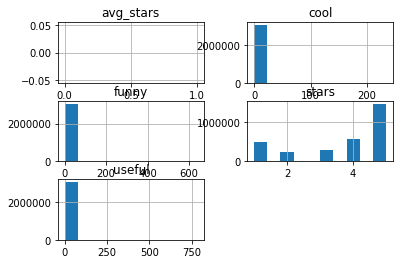

In [41]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final.hist()

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [42]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
path = '/Users/iris/desktop/BootCamp/BitTiger-DS501-1803/Homework/Yelp_Data_Challenge_Project/code/data/'
df_final.to_csv(os.path.join(path+'last_2_years_restaurant_reviews.csv'))